<a href="https://colab.research.google.com/github/ashehxn/dl-lab2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [65]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [0 5 0 2 1 4 0 5 4 5]


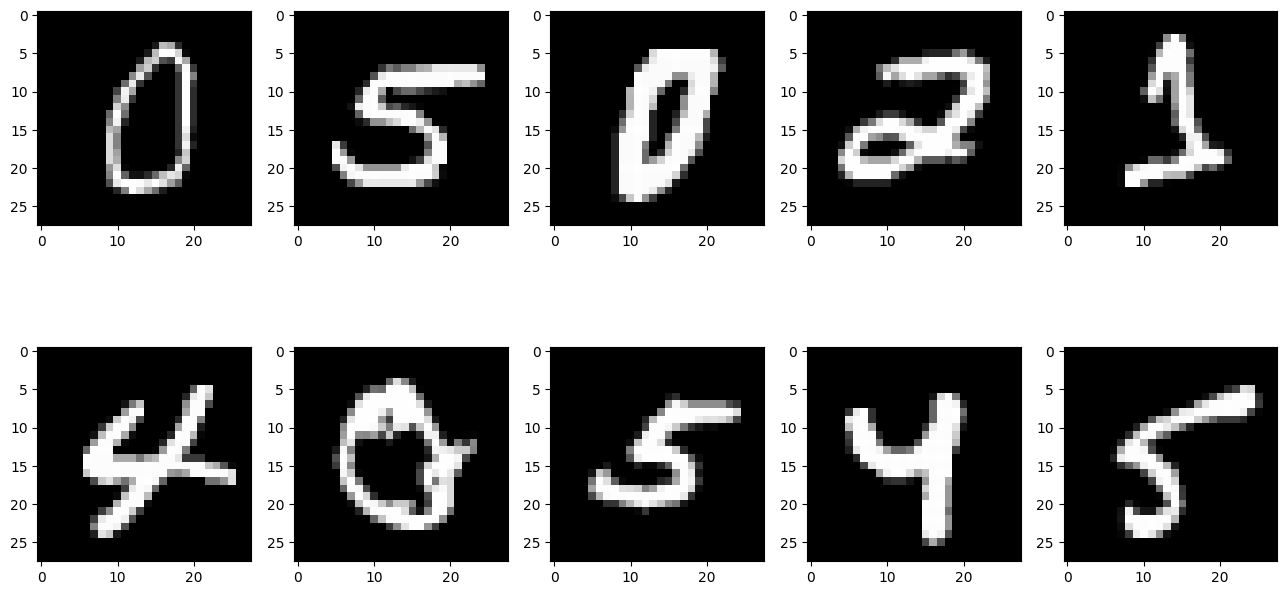

In [66]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [67]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [68]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [70]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15, verbose=0)

Plot the loss and accuracy graphs

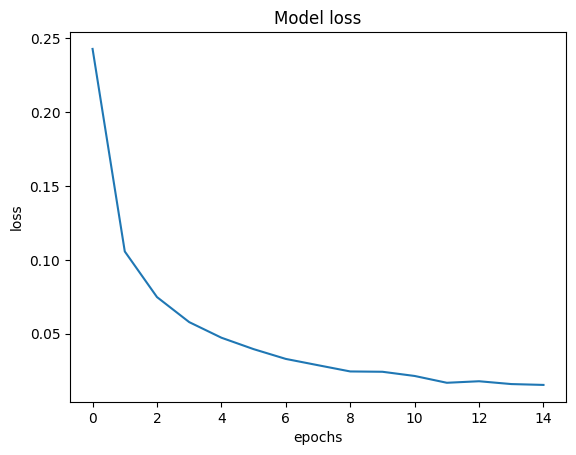

In [71]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

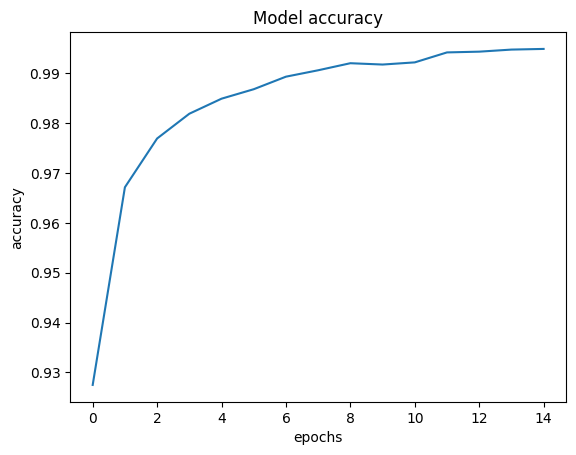

In [72]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [73]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1544
Loss of the Test dataset is: 0.12857474386692047
Accuracy of the test dataset is: 0.9753000140190125


Save the model weights

In [74]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [75]:
from tensorflow.keras import regularizers

# 1. Define the regularized model architecture
regularized_model = Sequential()
regularized_model.add(Flatten(input_shape=(28, 28)))

# Add L1 and L2 regularization to each Dense layer
regularized_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
regularized_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
regularized_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
regularized_model.add(Dense(10, activation='softmax'))

# 2. Compile the model
regularized_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Retrain the model
print("\n--- Training the Regularized Model ---")
regularized_model.fit(new_train_data, new_train_target, epochs=15, verbose=0)
print("--- Training Complete ---")

# 4. Evaluate the regularized model
loss, acc = regularized_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f'\n--- Evaluation of Regularized Model ---')
print(f'Loss of the Test dataset is: {loss:.5f}')
print(f'Accuracy of the test dataset is: {acc*100:.2f}%')


--- Training the Regularized Model ---
--- Training Complete ---

--- Evaluation of Regularized Model ---
Loss of the Test dataset is: 0.13856
Accuracy of the test dataset is: 97.83%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


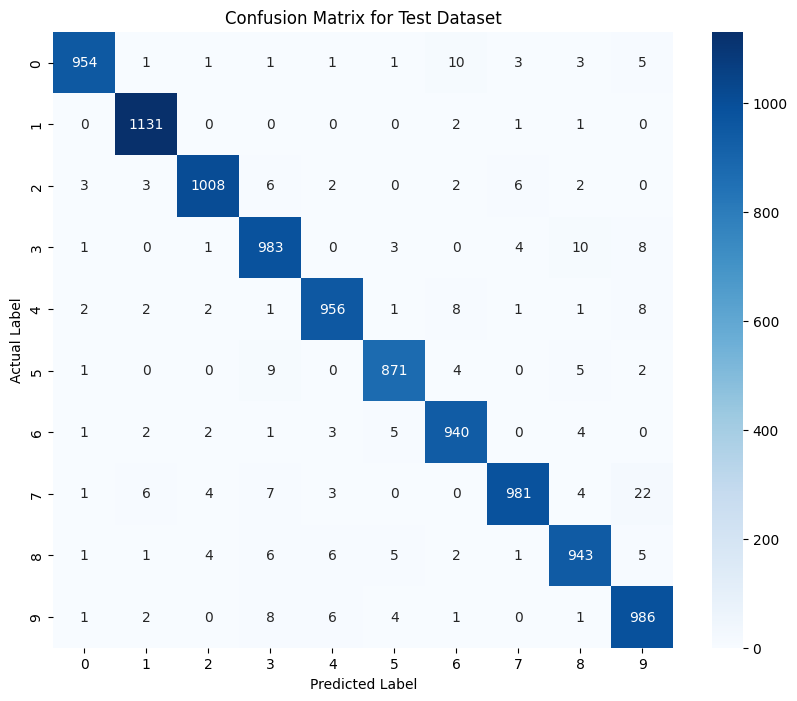

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Get predictions from the improved model on the test data
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Get the true labels
true_classes = np.argmax(new_test_target, axis=1)

# 3. Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Dataset')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()